importacao de biblioticas


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os

Importacao e limpeza de dados


In [4]:

pla_fib_1 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_1.csv', encoding='ISO-8859-1', delimiter=';')    
pla_fib_2 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_2.csv', encoding='ISO-8859-1', delimiter=';') 
pla_fib_3 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_3.csv', encoding='ISO-8859-1', delimiter=';') 
pla_fib_4 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_4.csv', encoding='ISO-8859-1', delimiter=';') 

pla_norm_1 = pd.read_csv('PLA NORMAL/PLA NORMAL_1_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True)    
pla_norm_2 = pd.read_csv('PLA NORMAL/PLA NORMAL_2_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 
pla_norm_3 = pd.read_csv('PLA NORMAL/PLA NORMAL_3_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 
pla_norm_4 = pd.read_csv('PLA NORMAL/PLA NORMAL_4_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 

pla_fibs = [pla_fib_1, pla_fib_2, pla_fib_3, pla_fib_4]
pla_norms = [pla_norm_1, pla_norm_2, pla_norm_3, pla_norm_4]


for i in range(len(pla_fibs)):
    pla_fibs[i] = pla_fibs[i].drop(0)
    pla_fibs[i] = pla_fibs[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_fibs[i] = pla_fibs[i].astype(float)

for i in range(len(pla_norms)):
    pla_norms[i] = pla_norms[i].drop(0)
    pla_norms[i] = pla_norms[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_norms[i] = pla_norms[i].astype(float)





Geracao de dados importantes


In [5]:
print(f'FIBRA DE CARBONO')
for i in range(len(pla_fibs)):
    tensao = pla_fibs[i]['Tensão à tração']
    deformacao = pla_fibs[i]['Deformação à tração (Deslocamento)']

    # Filter to get the initial linear region (up to 0.02 strain)
    linear_region = pla_fibs[i][pla_fibs[i]['Deformação à tração (Deslocamento)'] < .8]
    tensao_linear = linear_region['Tensão à tração']
    deformacao_linear = linear_region['Deformação à tração (Deslocamento)']

    # Use linear regression to find the slope (Young's modulus)
    slope, intercept, _, _, _ = linregress(deformacao_linear/100, tensao_linear) #agnt divide por 100 pq a deformacao ta em porcentagem
    modulo_elasticidade = slope

    # Filter to get the plastic region (from 0.02 strain to the end)
    plastic_region = pla_fibs[i][(pla_fibs[i]['Deformação à tração (Deslocamento)'] >= 1)]
    tensao_plastic = plastic_region['Tensão à tração']
    deformacao_plastic = plastic_region['Deformação à tração (Deslocamento)']

    # Calculate the plastic modulus using linear regression
    slope_plastic, intercept_plastic, _, _, _ = linregress(deformacao_plastic/100, tensao_plastic)
    modulo_plastico = slope_plastic

    resistencia_maxima = tensao.max()
    deformacao_maxima = deformacao[tensao.idxmax()] #deformacao na resistencia maxima
    resistencia_ruptura = tensao.iloc[-1]
    deformacao_ruptura = deformacao.iloc[-1]
    tenacidade = np.trapz(tensao, deformacao)
    poisson = np.abs(modulo_plastico/modulo_elasticidade) * 10


    print(f"Amostra {i+1}:")
    print(f" - Módulo de Elasticidade: {modulo_elasticidade:.2f} MPa")
    print(f" - Resistência Máxima: {resistencia_maxima:.2f} MPa")
    print(f" - Deformação na Resistência Máxima: {deformacao_maxima:.4f}%")
    print(f" - Resistência na Ruptura: {resistencia_ruptura:.2f} MPa")
    print(f" - Deformação na Ruptura: {deformacao_ruptura:.4f}")
    print(f" - Tenacidade: {tenacidade:.2f} J/m³")
    print(f" - Coeficiente de Poisson: {poisson:.2f}")
    print("-" * 40)


print(f'PLA NORMAL')
for i in range(len(pla_norms)):
    tensao = pla_norms[i]['Tensão à tração']
    deformacao = pla_norms[i]['Deformação à tração (Deslocamento)']

    # Filter to get the initial linear region (up to 0.02 strain)
    linear_region = pla_norms[i][pla_norms[i]['Deformação à tração (Deslocamento)'] < 1]
    tensao_linear = linear_region['Tensão à tração']
    deformacao_linear = linear_region['Deformação à tração (Deslocamento)']

    # Use linear regression to find the slope (Young's modulus)
    slope, intercept, _, _, _ = linregress(deformacao_linear/100, tensao_linear) #agnt divide por 100 pq a deformacao ta em porcentagem
    modulo_elasticidade = slope

    
    # Filter to get the plastic region (from 0.02 strain to the end)
    plastic_region = pla_norms[i][(pla_norms[i]['Deformação à tração (Deslocamento)'] >= 1.5) ]
    tensao_plastic = plastic_region['Tensão à tração']
    deformacao_plastic = plastic_region['Deformação à tração (Deslocamento)']

    # Calculate the plastic modulus using linear regression
    slope_plastic, intercept_plastic, _, _, _ = linregress(deformacao_plastic/100, tensao_plastic)
    modulo_plastico = slope_plastic

    resistencia_maxima = tensao.max()
    deformacao_maxima = deformacao[tensao.idxmax()] #deformacao na resistencia maxima
    resistencia_ruptura = tensao.iloc[-1]
    deformacao_ruptura = deformacao.iloc[-1]
    tenacidade = np.trapz(tensao, deformacao)
    poisson = np.abs(modulo_plastico/modulo_elasticidade)/10


    print(f"Amostra {i+1}:")
    print(f" - Módulo de Elasticidade: {modulo_elasticidade:.2f} MPa")
    print(f" - Resistência Máxima: {resistencia_maxima:.2f} MPa")
    print(f" - Deformação na Resistência Máxima: {deformacao_maxima:.4f}%")
    print(f" - Resistência na Ruptura: {resistencia_ruptura:.2f} MPa")
    print(f" - Deformação na Ruptura: {deformacao_ruptura:.4f}")
    print(f" - Tenacidade: {tenacidade:.2f} J/m³")
    print(f" - Coeficiente de Poisson: {poisson:.2f}")
    print("-" * 40)


FIBRA DE CARBONO
Amostra 1:
 - Módulo de Elasticidade: 2113.37 MPa
 - Resistência Máxima: 21.01 MPa
 - Deformação na Resistência Máxima: 1.3755%
 - Resistência na Ruptura: 10.02 MPa
 - Deformação na Ruptura: 6.9259
 - Tenacidade: 120.58 J/m³
 - Coeficiente de Poisson: 0.30
----------------------------------------
Amostra 2:
 - Módulo de Elasticidade: 2183.74 MPa
 - Resistência Máxima: 23.30 MPa
 - Deformação na Resistência Máxima: 1.5734%
 - Resistência na Ruptura: 11.91 MPa
 - Deformação na Ruptura: 5.3663
 - Tenacidade: 104.88 J/m³
 - Coeficiente de Poisson: 0.57
----------------------------------------
Amostra 3:
 - Módulo de Elasticidade: 2145.07 MPa
 - Resistência Máxima: 20.69 MPa
 - Deformação na Resistência Máxima: 1.3492%
 - Resistência na Ruptura: 9.88 MPa
 - Deformação na Ruptura: 6.4485
 - Tenacidade: 110.61 J/m³
 - Coeficiente de Poisson: 0.32
----------------------------------------
Amostra 4:
 - Módulo de Elasticidade: 2220.94 MPa
 - Resistência Máxima: 24.35 MPa
 - Defo

/tmp/ipykernel_179674/1669167711.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tenacidade = np.trapz(tensao, deformacao)
/tmp/ipykernel_179674/1669167711.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tenacidade = np.trapz(tensao, deformacao)
/tmp/ipykernel_179674/1669167711.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tenacidade = np.trapz(tensao, deformacao)
/tmp/ipykernel_179674/1669167711.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tenacidade = np.trapz(tensao, deformacao)
/tmp/ipykernel_179674/1669167711.py:71: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of th

Plotagem dos graficos


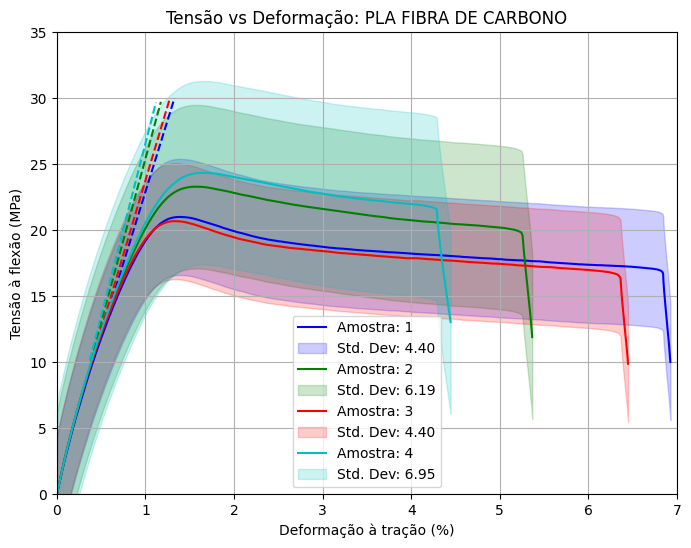

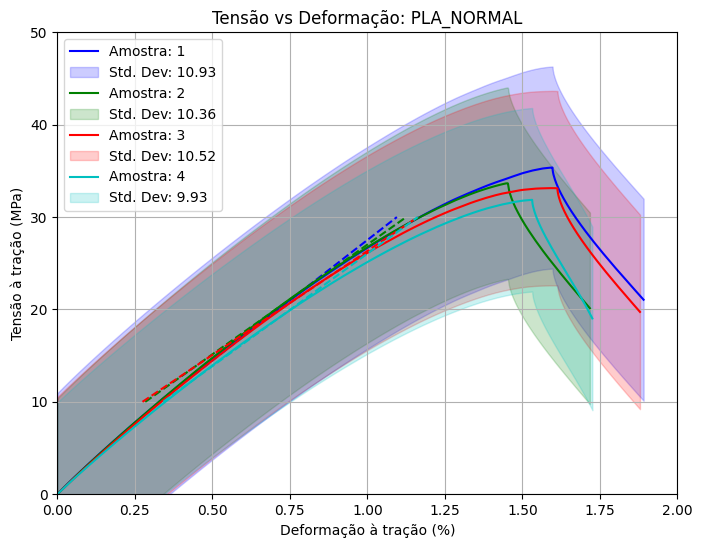

In [8]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# First figure for 'pla_fibs' data
plt.figure(figsize=(8, 6))
for i in range(len(pla_fibs)):
    deslocamento = pla_fibs[i]['Deformação à tração (Deslocamento)']
    tensao_flexao = pla_fibs[i]['Tensão à tração']

    # Filter data from 0 to 2.5
    '''
    mask = (deslocamento >= 0) & (deslocamento <= 2.5)
    deslocamento = deslocamento[mask]
    tensao_flexao = tensao_flexao[mask]
    '''
    
    # Plot main data
    plt.plot(deslocamento, tensao_flexao, label=f'Amostra: {i + 1}', color=colors[i])
    
    # Calculate standard deviation and fill
    std_dev = np.std(tensao_flexao)
    plt.fill_between(deslocamento, tensao_flexao - std_dev, tensao_flexao + std_dev,
                     color=colors[i], alpha=0.2, label=f'Std. Dev: {std_dev:.2f}')


    # Calculate tangent line at the middle point
    mid_idx = len(deslocamento) //12 # index for the middle point
    x0, y0 = deslocamento[mid_idx], tensao_flexao[mid_idx]
    slope, intercept = np.polyfit(deslocamento[mid_idx-1:mid_idx+2], tensao_flexao[mid_idx-1:mid_idx+2], 1)
    tangent_line = slope * (deslocamento - x0) + y0

  # Limit tangent line values between y = 40 and y = 80
    mask = (tangent_line >= 10) & (tangent_line <= 30)
    deslocamento = deslocamento[mask]
    tangent_line = tangent_line[mask]


    # Plot tangent line
    plt.plot(deslocamento, tangent_line, '--', color=colors[i])
    plt.xlim(0, 7)
    plt.ylim(0, 35)

    # Add labels, grid, title, and legend
    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à flexão (MPa)')
    plt.title(f'Tensão vs Deformação: PLA FIBRA DE CARBONO')
    plt.grid(True)
    plt.legend()
plt.savefig(os.path.join('figs', f'PLA_FIBRA_DE_CARBONO.png'))

# Second figure for 'pla_norms' data
plt.figure(figsize=(8, 6))
for i in range(len(pla_norms)):
    deslocamento = pla_norms[i]['Deformação à tração (Deslocamento)']
    tensao_flexao = pla_norms[i]['Tensão à tração']

    # Plot main data
    plt.plot(deslocamento, tensao_flexao, label=f'Amostra: {i + 1}', color=colors[i])
    
    # Calculate standard deviation and fill
    std_dev = np.std(tensao_flexao)
    plt.fill_between(deslocamento, tensao_flexao - std_dev, tensao_flexao + std_dev,
                     color=colors[i], alpha=0.2, label=f'Std. Dev: {std_dev:.2f}')

    # Calculate tangent line at the middle point
    mid_idx = len(deslocamento) //2
    x0, y0 = deslocamento[mid_idx], tensao_flexao[mid_idx]
    # Use numpy's polyfit to get the slope of the tangent line at the middle point
    slope, intercept = np.polyfit(deslocamento[mid_idx-1:mid_idx+2], tensao_flexao[mid_idx-1:mid_idx+2], 1)
    tangent_line = slope * (deslocamento - x0) + y0


    # Limit tangent line values between y = 40 and y = 80
    mask = (tangent_line >= 10) & (tangent_line <= 30)
    deslocamento = deslocamento[mask]
    tangent_line = tangent_line[mask]

    # Plot tangent line
    plt.plot(deslocamento, tangent_line, '--', color=colors[i])
    plt.xlim(0, 2)
    plt.ylim(0, 50)

    # Add labels, grid, title, and legend
    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à tração (MPa)')
    plt.title(f'Tensão vs Deformação: PLA_NORMAL')
    plt.grid(True)
    plt.legend()
plt.savefig(os.path.join('figs', f'PLA NORMAL'))
